# Business Case : YULU - HYPOTHESIS TESTING

<u>ABOUT YULU</u>:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

<u>PROBLEM STATEMENT</u>:
1. Analysing, which of the variables are significant in predicting the demand for shared
electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

In [30]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Loading the Yulu File
df = pd.read_csv('bike_sharing.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
df.sample(5) # sample of dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
7529,2012-05-13 02:00:00,2,0,0,2,22.14,25.760,68,11.0014,22,60,82
10346,2012-11-16 12:00:00,4,0,1,1,16.40,20.455,43,19.0012,28,262,290
3156,2011-08-01 10:00:00,3,0,1,1,35.26,37.880,36,11.0014,27,70,97
3622,2011-09-01 20:00:00,3,0,1,1,27.06,31.060,61,15.0013,33,247,280
7484,2012-05-11 05:00:00,2,0,1,1,17.22,21.210,47,11.0014,3,23,26


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [34]:
df.shape # There are 10886 rows and 12 cols

(10886, 12)

In [35]:
df.describe() #descriptive stats for numerical column

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [36]:
df.isna().sum().sum()
#we can see there are no missing values in the dataset

0

In [37]:
df.duplicated().value_counts()
#there are no duplicated records

False    10886
dtype: int64

In [38]:
#We need to convert the datetime column to datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Observations:
1. Yulu is a company about rental electriv bikes.
2. Yulu dataset contains data about different features, ranging
from count of users split between casual and registered, to
features like wheather, working day, temperature, humidity etc.
3. The Dataset has 10886 entries, of which none of the features
have any missing values.
4. There are in total 12 features, of which few are numerical and
others are categorical, but most of the categorical features have
also been converted to integers for ease of calculations, also one
of the feature is a datatimestamp.
5. The Shape of the dataset is (10886,12).

In [39]:
# Analysing each feature
# Converting each feature to appropriate datatype for better analyse 
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [40]:
# Converting Datetime to type Datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [41]:
# Converting appropriate columns to Category type
columns=['season','holiday','workingday','weather']
df[columns]=df[columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [42]:
# let's see the Dataframe's proper statistical summary
df.describe(include='all',datetime_is_numeric=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observations:
    
    
1. For the feature Season, Season 4 is the most frequent, and there are in total 4 unique seasons.
2. For the feature Holiday, there are 10575 days with no holidays from a total of 10886.
3. For the feature Workingday, there are 7412 working days, rest are either weekend or holidays.
4. For the feature Weather, weather type 1 is the most frequent with 4 unique weather types.
5. For the numerical feature Temp, mean is 20.23, median is 20.50, signifying robustness of the data, with a standard deviation of 7.8, in celcius, with minimum temperature as 0.82 and maximum as 41.
6. For the numerical feature aTemp, mean is 23.65, median is 24.24, signifying robustness of the data, with a standard deviation of 8.4, in celcius, with minimum temperature as 0.76 and maximum as 45.45.
7. For the numerical feature Humidity, mean is 61.88, median is 62, signifying robustness of the data, with a standard deviation of 19.24, with minimum value as 0 and maximum as 100.
8. For the numerical feature Windspeed, mean is 12.9, median is 13, signifying robustness of the data, with a standard deviation of 8.2, with minimum windspeed as 0 and maximum as 56.99.
9. For the numerical feature Casual, mean is 36, median is 17, signifying weakness of the data, with a standard deviation of 49, with minimum count as 0 and maximum as 367.
10. For the numerical feature Registered, mean is 155, median is 118, signifying weakness of the data, with a standard deviation of 151, with minimum count as 0 and maximum as 886.
11. For the numerical feature Count, mean is 191, median is 141, signifying weakness of the data, with a standard deviation of 181, with minimum count as 0 and maximum as 977
12. For the Datetime feature, the starting date is 2011-01-01 00:00:00 and it goes till 2012-12-19 23:00:00, spanning almost 2 years.

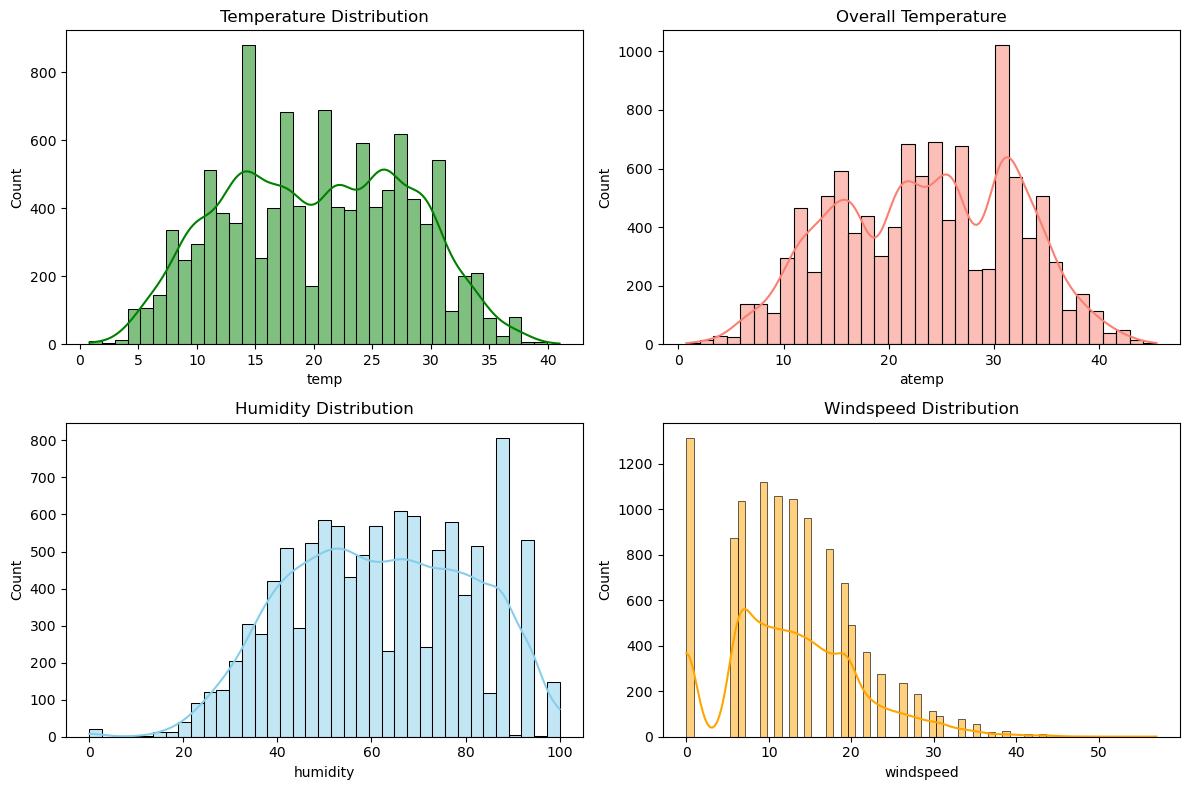

In [43]:
# histograms for numerical variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(data=df,x='temp',kde=True,color='green')
plt.title("Temperature Distribution")
plt.subplot(2,2,2)
sns.histplot(data=df,x='atemp',color='salmon',kde=True)
plt.title('Overall Temperature')
plt.subplot(2,2,3)
sns.histplot(data=df,x='humidity',kde=True,color='skyblue')
plt.title('Humidity Distribution')
plt.subplot(2,2,4)
sns.histplot(data=df,x='windspeed',kde=True,color='orange')
plt.title('Windspeed Distribution')
plt.tight_layout()
plt.show()

Humidity (Left-Skewed):
Left-skewed distribution suggests that most of the data points are concentrated on the higher end of the humidity scale.

Windspeed (Right-Skewed):
Right-skewed distribution suggests that most of the data points are concentrated on the lower end of the windspeed scale.

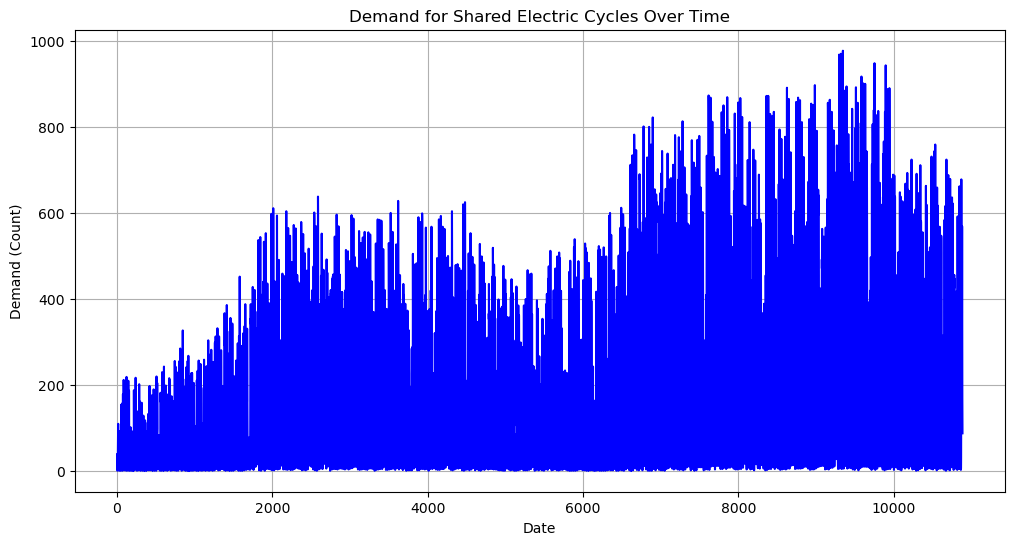

In [44]:
df.set_index('datetime')
# Plot the demand for shared electric cycles over time
plt.figure(figsize=(12, 6))
plt.plot(df['count'], color='blue', linestyle='-')
plt.title('Demand for Shared Electric Cycles Over Time')
plt.xlabel('Date')
plt.ylabel('Demand (Count)')
plt.grid(True)
plt.show()

In [45]:
df['workingday'].value_counts() #there are 7412 working days and 3474 non work

1    7412
0    3474
Name: workingday, dtype: int64

In [46]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

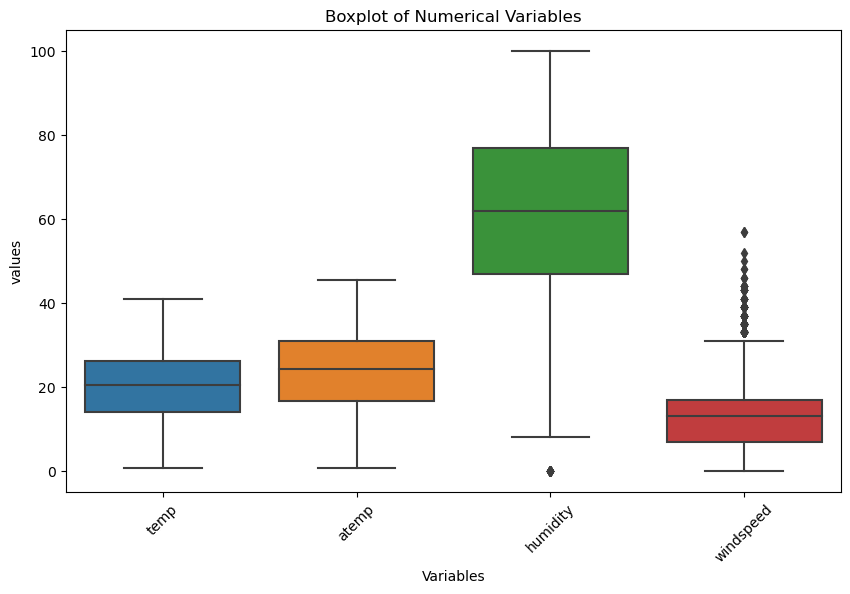

In [47]:
numerical_vars=['temp','atemp','humidity','windspeed']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_vars])
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.show()

The windspeed variable in the dataset contains outliers, indicating potential extreme values that deviate from the majority of data points. (But should not be ignored)

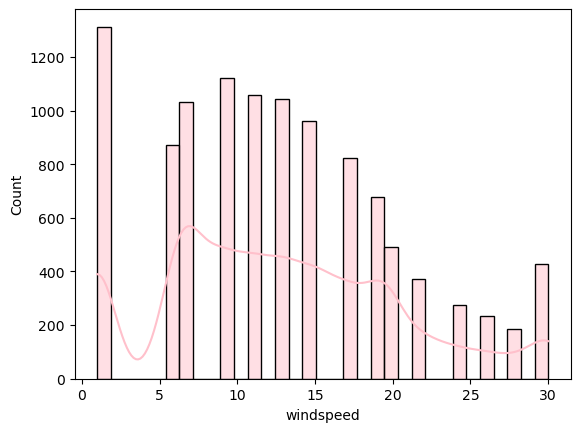

In [48]:
lower_bound=1
upper_bound=30
df['windspeed'] = df['windspeed'].clip(lower=lower_bound,upper=upper_bound)
#Rechecking
plt.figure()
sns.histplot(data=df,x='windspeed',kde=True,color='pink')
plt.show()

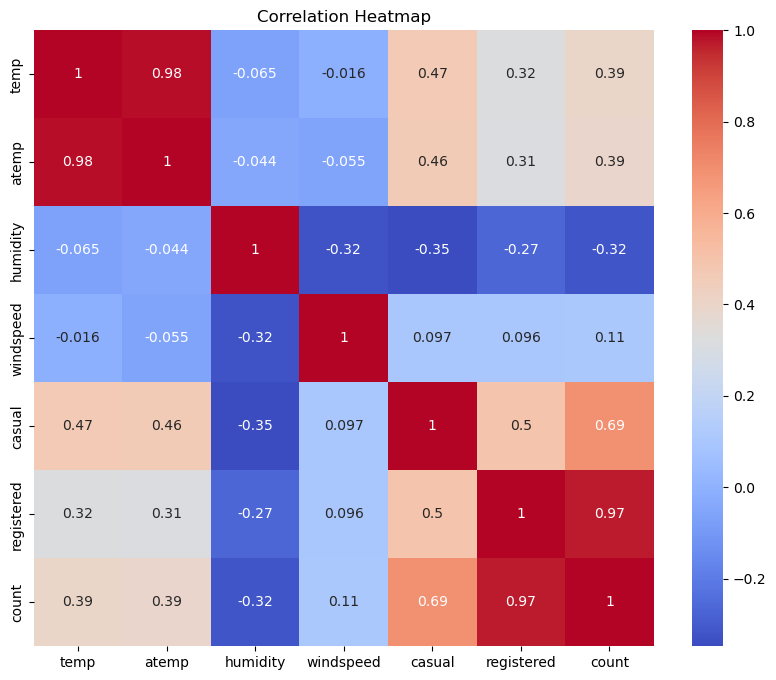

In [49]:
#Correlationbetween Data Points
correlation_matrix =df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
# we came to know that temp & atemp are highly corelated and then Registered &
df=df.drop(columns=['atemp','registered'])

In [51]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count
2992,2011-07-13 14:00:00,3,0,1,3,33.62,46,8.9981,27,116
2892,2011-07-09 10:00:00,3,0,0,1,31.16,52,11.0014,87,264
8329,2012-07-08 10:00:00,3,0,0,1,36.90,45,1.0000,85,319
6405,2012-03-04 03:00:00,1,0,0,2,14.76,43,8.9981,5,26
9270,2012-09-09 15:00:00,3,0,0,1,29.52,32,16.9979,284,696


## Is there any significant difference between the no. of bike rides on Weekdays and Weekends?

Formulate Null Hypothesis and Alternate Hypothesis


H0(Null Hypothesis):There is no significant difference in the number of bike rides between weekdays and weekends.


HA(Alternate Hypothesis):There is a significant difference in the number of bike rides between weekdays and weekends.


In [52]:
from scipy.stats import ttest_ind
weekdays=df[df['workingday']==1]['count']
weekends=df[df['workingday']==0]['count']
t_stats,p_val =ttest_ind(weekdays,weekends)
print("test statistics",t_stats)
print("p_value :",p_val)

test statistics 1.2096277376026694
p_value : 0.22644804226361348


fail to reject the null hypothesis. There is no significant difference in the
number of bike rides between weekdays and weekends.


1. This implies that there is no significant difference in the number of bike rides between weekdays and weekends.
2. The analysis suggests that the demand for bike rides remains relatively consistent between weekdays and weekends.
3. Yulu may not need to adjust its operational strategies significantly based on whether it's a weekday or weekend.
4. Yulu can focus on expanding its services and coverage areas to meet the consistent demand observed across all days of the week.

## Is their demand of bicycles on rent is the same for different Weather conditions?


Formulate the null hypothesis and alternative hypothesis

Null Hypothesis H0: There is no difference in the demand for bicycles on rent across different weather


Alternate Hypothesis HA: There is significant difference in the demand for bicycles on rent across different weather conditions.

**We need to use annova here but anova has assumption of normality and
equality of variance, using qq plot shapiro test we check normality and for
equality of variance we use levene test.**


--- Weather Condition: 1 ---


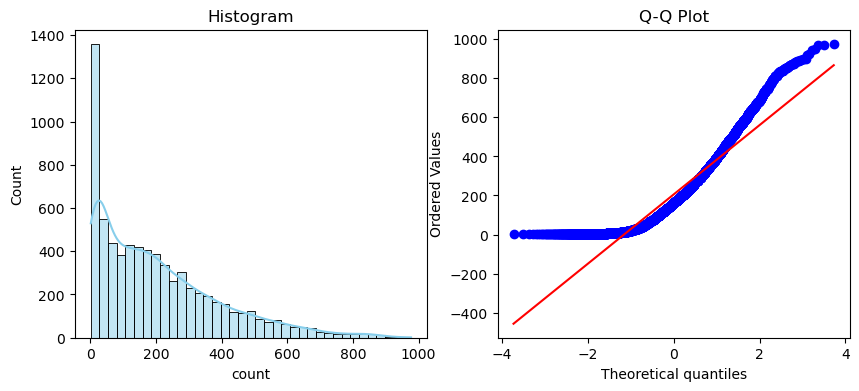

Skewness: 1.1396195185041555
Kurtosis: 0.9632151489948488
Shapiro-Wilk's Test p-value: 0.0
Data is not normally distributed.


--- Weather Condition: 2 ---


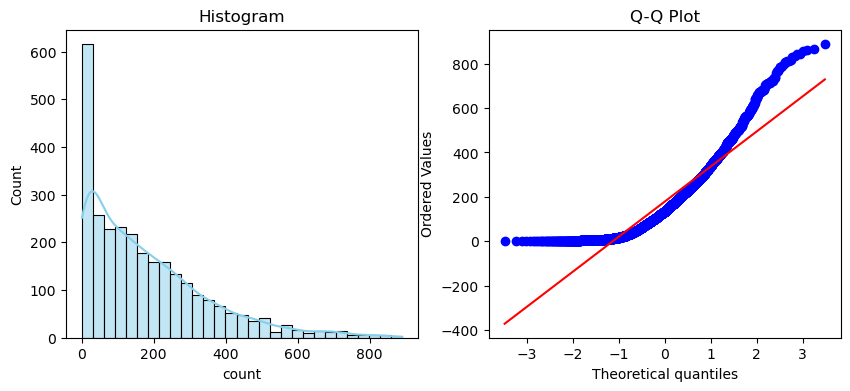

Skewness: 1.293759189703101
Kurtosis: 1.5835130178554868
Shapiro-Wilk's Test p-value: 9.781063280987223e-43
Data is not normally distributed.


--- Weather Condition: 3 ---


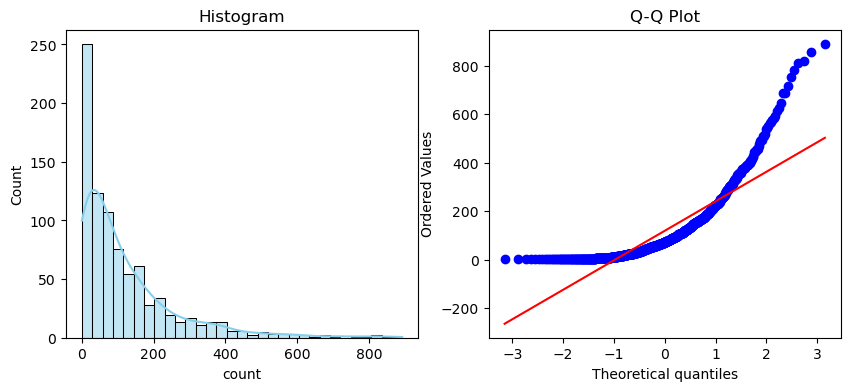

Skewness: 2.1833160390123187
Kurtosis: 5.961191782478394
Shapiro-Wilk's Test p-value: 3.876090133422781e-33
Data is not normally distributed.


--- Weather Condition: 4 ---


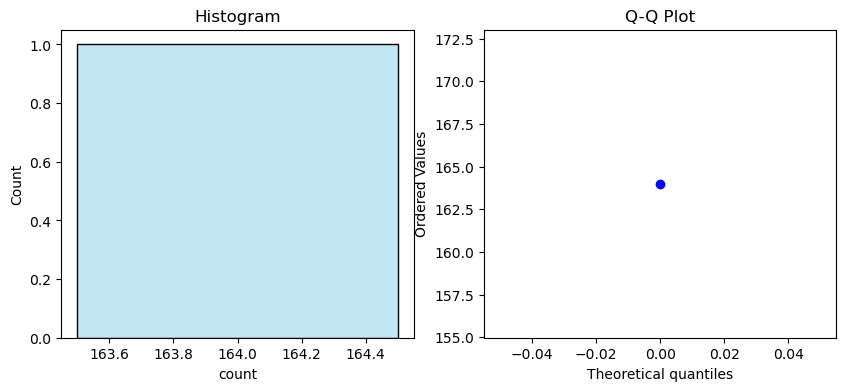

Skewness: nan
Kurtosis: nan
Insufficient data points for Shapiro-Wilk's test.




In [53]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby('weather')['count']
for weather, data in grouped_data:
    print(f"--- Weather Condition: {weather} ---")

    # distribution using histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='skyblue')
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Calculate skewness and kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Shapiro-Wilk's test for normality
    if len(data) >= 3:
        shapiro_test = stats.shapiro(data)
        print(f"Shapiro-Wilk's Test p-value: {shapiro_test[1]}")

        # Print normality assessment
        if shapiro_test[1] > 0.05:
            print("Data is normally distributed.")
        else:  # Correct indentation
            print("Data is not normally distributed.")
    else:
        print("Insufficient data points for Shapiro-Wilk's test.")
    print("\n")


In [54]:
from scipy.stats import levene
weather_groups = [data for weather, data in grouped_data]
# Perform Levene's test for equality of variances
levene_test = levene(*weather_groups)
# Print the test statistic and p-value
print("Levene's Test Statistic:", levene_test.statistic)
print("Levene's Test p-value:", levene_test.pvalue)
# Interpret the results
if levene_test.pvalue > 0.05:
    print("The variances are approximately equal across different weather conditions")
else:
 print("The variances are not equal across different weather conditions.")

Levene's Test Statistic: 54.85106195954556
Levene's Test p-value: 3.504937946833238e-35
The variances are not equal across different weather conditions.


Assumptions are not true still we will check for anova test

In [55]:
#1. H0: There is no difference in the demand for bicycles on rent
#across different weather
#2. HA: There is significant difference in the demand for
#bicycles on rent across different weather conditions.
from scipy.stats import f_oneway
# data for each weather condition
weather_groups = [data for weather, data in grouped_data]
anova_result = f_oneway(*weather_groups)
print("ANOVA Test Statistic:", anova_result.statistic)
print("ANOVA Test p-value:", anova_result.pvalue)
# results
if anova_result.pvalue < 0.05:
 print("Reject the null hypothesis, There is a significant difference in the demand of bicycles on rent for different weather conditions")
else:
 print("Fail to reject the null hypothesis. There is no significant difference")

ANOVA Test Statistic: 65.53024112793271
ANOVA Test p-value: 5.482069475935669e-42
Reject the null hypothesis, There is a significant difference in the demand of bicycles on rent for different weather conditions


## Is their demand of bicycles on rent is the same for different Seasons?

Formulate Null Hypothesis (H0) and Alternate Hypothesis (HA)

Null Hypothesis (H0): The demand for bicycles on rent is the same across different seasons.

Alternate Hypothesis (HA): The demand for bicycles on rent is different across different
seasons.

Null Hypothesis (H0): The demand for bicycles on rent is the same across seasons.
Alternate Hypothesis (H1): The demand for bicycles on rent is different across seasons.
--- Season: 1 ---


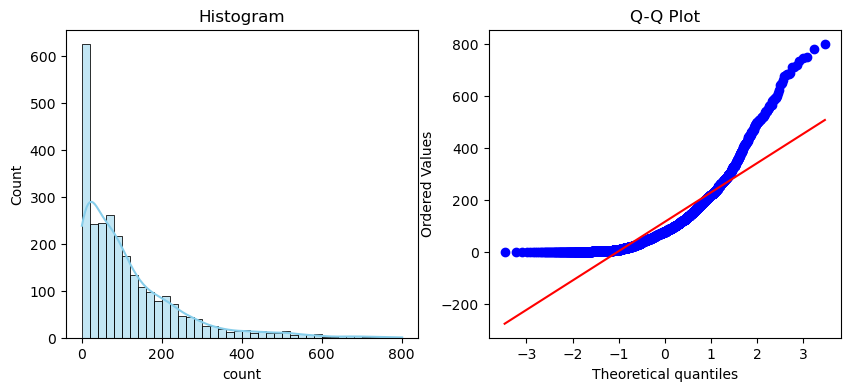

Skewness: 1.8870013494363214
Kurtosis: 4.30449666648592
Shapiro-Wilk's Test p-value: 0.0
Data does not appear to be normally distributed.


--- Season: 2 ---


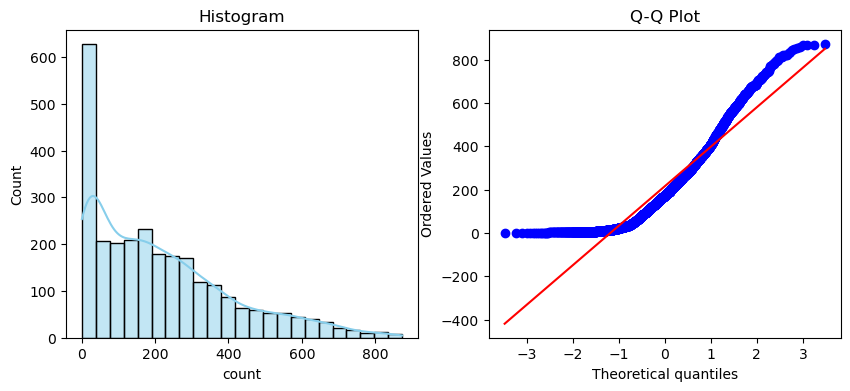

Skewness: 1.0027135037743604
Kurtosis: 0.4222412657621657
Shapiro-Wilk's Test p-value: 6.039093315091269e-39
Data does not appear to be normally distributed.
Levene's Test p-value: 9.72630153046414e-93
Variances are not equal across seasons.


--- Season: 3 ---


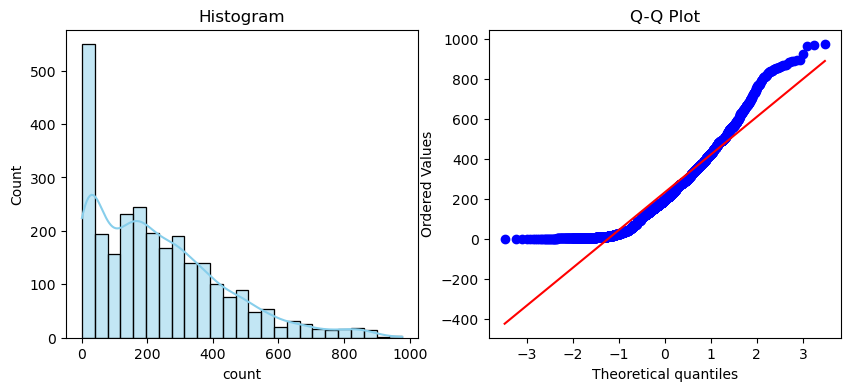

Skewness: 0.9909503852121176
Kurtosis: 0.6959091337333851
Shapiro-Wilk's Test p-value: 1.043458045587339e-36
Data does not appear to be normally distributed.
Levene's Test p-value: 4.930332866006357e-102
Variances are not equal across seasons.


--- Season: 4 ---


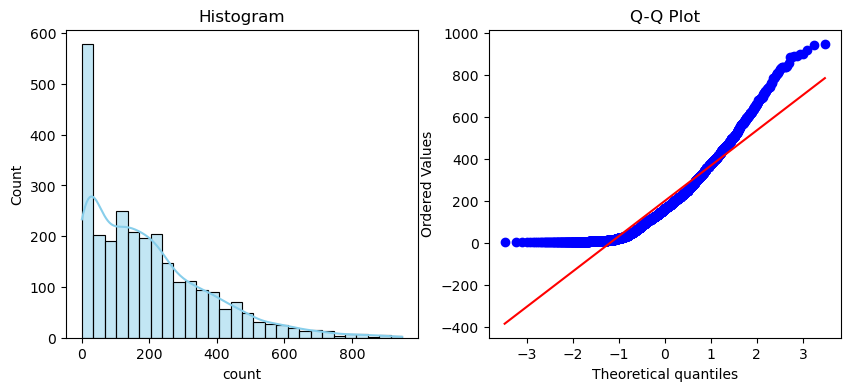

Skewness: 1.1714741534595685
Kurtosis: 1.2689637849725477
Shapiro-Wilk's Test p-value: 1.1301682309549298e-39
Data does not appear to be normally distributed.
Levene's Test p-value: 2.542187031248091e-61
Variances are not equal across seasons.



--- One-way ANOVA Test ---
ANOVA Test Statistic: 236.94671081032106
ANOVA Test p-value: 6.164843386499654e-149
Reject the null hypothesis. There is a significant difference in the demand for bicycles on rent across seasons.


In [56]:
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene, f_oneway

print('''Null Hypothesis (H0): The demand for bicycles on rent is the same across seasons.
Alternate Hypothesis (H1): The demand for bicycles on rent is different across seasons.''')

# Data for each season
season_groups = [data for season, data in df.groupby('season')['count']]
for season, data in zip(range(1, 5), season_groups):
    print(f"--- Season: {season} ---")

    # Visualize distribution using histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='skyblue')
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Skewness and kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Shapiro-Wilk's test for normality
    shapiro_test = shapiro(data)
    print(f"Shapiro-Wilk's Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Data appears to be normally distributed.")
    else:
        print("Data does not appear to be normally distributed.")
    
    # Levene's test for equality of variance
    if season != 1:  # Skip Levene's test for the first season (no comparison)
        levene_test = levene(season_groups[0], data)
        print(f"Levene's Test p-value: {levene_test.pvalue}")
        if levene_test.pvalue > 0.05:
            print("Variances are approximately equal across seasons.")
        else:
            print("Variances are not equal across seasons.")
    print("\n")

# One-way ANOVA test
anova_result = f_oneway(*season_groups)
print("\n--- One-way ANOVA Test ---")
print("ANOVA Test Statistic:", anova_result.statistic)
print("ANOVA Test p-value:", anova_result.pvalue)
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the demand for bicycles on rent across seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the demand for bicycles on rent across seasons.")


**Normality Assumption:**

For all seasons, the data does not appear to be normally distributed based on
Shapiro-Wilk's test, as all p-values are less than 0.05.

**Equality of Variance Assumption:**

Levene's test indicates that variances are not equal across seasons, as all pvalues are less than 0.05.

**ANOVA Test:**

The one-way ANOVA test statistic is 236.95 with a p-value of approximately
6.16e-149. Since the p-value is much less than the significance level
(alpha=0.05), we reject the null hypothesis. Therefore, There is a significant difference in the demand of bicycles on rent across different seasons.


## If the Weather conditions are significantly different during different Seasons?

Formulate Null Hypothesis (H0) and Alternate Hypothesis (HA)

(H0): The distribution of weather conditions is the same across different
seasons.

(H1): The distribution of weather conditions varies across different seasons.

we can use the chi-square test for independence.

In [57]:
from scipy.stats import chi2_contingency
print('''(H0): The distribution of weather conditions is the same across different seasons.
(H1): The distribution of weather conditions varies across different seasons.
''')

# Create a contingency table (cross-tabulation) for 'Weather' and 'Season'
contingency_table = pd.crosstab(df['weather'], df['season'])
print(contingency_table)

# Perform chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the test statistic and p-value
print("\nChi-square Test Statistic:", chi2)
print("Chi-square Test p-value:", p_value)

# Decide whether to accept or reject the Null Hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of weather conditions varies across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distribution of weather conditions across different seasons.")


(H0): The distribution of weather conditions is the same across different seasons.
(H1): The distribution of weather conditions varies across different seasons.

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

Chi-square Test Statistic: 49.15865559689363
Chi-square Test p-value: 1.5499250736864862e-07
Reject the null hypothesis. The distribution of weather conditions varies across different seasons.


The p-value is much less than the significance level (alpha=0.05), we reject the null hypothesis.
Therefore, we conclude that the distribution of weather conditions is significantly different during different seasons.

## key conclusions:

**Demand Factors:** The analysis identified significant factors influencing the demand for shared electric cycles in the Indian market. These factors can include weather conditions, seasons, working days, and holidays.

**Revenue Recovery Strategies:** Understanding the factors affecting demand allows Yulu to make informed adjustments to their services and strategies to recover from recent revenue setbacks. They can tailor their offerings based on seasonal variations and other demand drivers.

**Market Insights:** The analysis provides valuable insights into the Indian market's micro-mobility landscape. Yulu can use this information to optimize their operations, expand into new areas, and target specific customer segments effectively.

**Strategic Expansion:** Yulu's decision to enter the Indian market aligns with their mission to provide sustainable commute solutions. With a deeper understanding of demand factors, they can strategically expand their presence and enhance their services to meet the evolving needs of commuters.

**Data-Driven Decision Making:** The case study demonstrates the importance of data-driven decision-making in addressing real-world business challenges. By leveraging data analytics techniques, Yulu can continuously optimize their operations and offerings to stay competitive and fulfill their mission of reducing traffic congestion.

**Consulting Skills Development:** Learners engaging with this case study can develop essential consulting skills by applying machine learning and statistical analysis techniques to solve complex business problems. This experience prepares them to provide valuable insights and recommendations to organizations facing similar challenges in various industries.